In [3]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
dir='C:\\Users\\sujee\\OneDrive\\Desktop\\Jupyter_notebook\\leapGestRecog\\00'
categories=['01_palm','02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
data=[]
for x in categories:
    path=os.path.join(dir,x)
    label=categories.index(x)
    
    for img in os.listdir(path):
        imgpath=os.path.join(path,img)
        hand_img=cv2.imread(imgpath,0)
        try:
            pet_img=cv2.resize(hand_img,(50,50))
            image=np.array(hand_img).flatten()
    
            data.append([image,label])
        except Exception as e:
            pass


print(len(data))

1997


In [4]:
pick_in=open('data2.pickle','wb')
pickle.dump(data,pick_in)
pick_in.close()

pick_in=open('data2.pickle','rb')
data=pickle.load(pick_in)
pick_in.close()

data

[[array([ 2,  4,  3, ..., 25, 12, 16], dtype=uint8), 0],
 [array([ 2,  4,  3, ..., 25, 12, 16], dtype=uint8), 0],
 [array([ 4,  5,  4, ..., 25, 12, 16], dtype=uint8), 0],
 [array([ 4,  5,  4, ..., 25, 12, 16], dtype=uint8), 0],
 [array([ 5,  5,  5, ..., 25, 12, 16], dtype=uint8), 0],
 [array([ 5,  5,  5, ..., 25, 12, 16], dtype=uint8), 0],
 [array([ 3,  3,  3, ..., 25, 12, 16], dtype=uint8), 0],
 [array([ 5,  6,  4, ..., 25, 12, 16], dtype=uint8), 0],
 [array([ 4,  5,  5, ..., 25, 12, 16], dtype=uint8), 0],
 [array([ 4,  5,  5, ..., 25, 12, 16], dtype=uint8), 0],
 [array([ 6,  5,  5, ..., 25, 12, 16], dtype=uint8), 0],
 [array([ 6,  5,  5, ..., 25, 12, 16], dtype=uint8), 0],
 [array([ 4,  4,  4, ..., 25, 12, 16], dtype=uint8), 0],
 [array([ 6,  6,  5, ..., 25, 12, 16], dtype=uint8), 0],
 [array([ 5,  4,  7, ..., 25, 12, 16], dtype=uint8), 0],
 [array([ 5,  5,  6, ..., 25, 12, 16], dtype=uint8), 0],
 [array([ 5,  4,  4, ..., 25, 12, 16], dtype=uint8), 0],
 [array([ 5,  6,  6, ..., 25, 1

In [5]:
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
random.shuffle(data)
features=[]
labels=[]

for feature,label in data:
    features.append(feature)
    labels.append(label)

x_train,x_test,y_train,y_test=train_test_split(features,labels,test_size=0.6)
model=SVC(C=1,kernel='poly',gamma='auto')
model.fit(x_train,y_train)

pick=open('model.sav','wb')
pickle.dump(model,pick)
pick.close()

In [6]:
pick=open('model.sav','rb')
model=pickle.load(pick)
pick.close()

Accuracy: 1.0
Prediction is: 07_ok


TypeError: Invalid shape (153600,) for image data

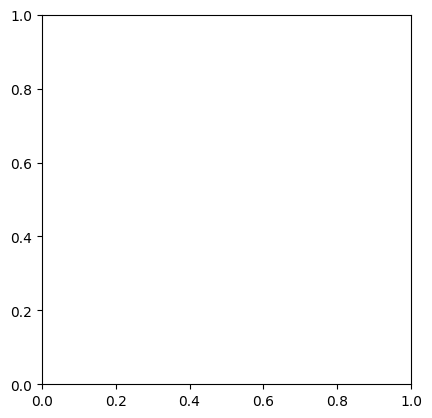

In [10]:
prediction=model.predict(x_test)
accuracy=model.score(x_test,y_test)

print('Accuracy:',accuracy)
print('Prediction is:',categories[prediction[0]])

myhand=x_test[8].reshape(50,50)
plt.imshow(myhand,cmap='gray')

In [14]:
print("Original array size:", x_test[8].size)

Original array size: 153600


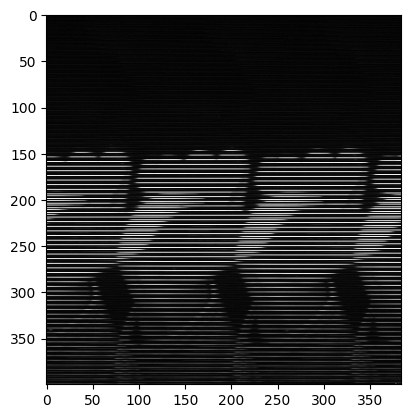

In [17]:
def factors(n):
    return sorted(set(
        factor for i in range(1, int(n**0.5) + 1) if n % i == 0
        for factor in (i, n // i)
    ))

# Calculate factors of 153600
array_size = 153600
array_factors = factors(array_size)

# Choose dimensions close to square
side_length = array_factors[len(array_factors) // 2]

# Reshape the array
myhand = x_test[45].reshape(side_length, -1)

# Display the image
plt.imshow(myhand, cmap='gray')